In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os
import creep_event_picker as cep
import obspy
import cmcrameri.cm as cmc
%matplotlib inline


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def check_dir(path):
    isExist = os.path.exists(path)
    if not isExist:
        # Create a new directory because it does not exist 
        os.makedirs(path, exist_ok=True)

Import creepmeter database

In [1]:
Creepmeter_dataframe = pd.read_csv('../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
Creepmeter_dataframe

NameError: name 'pd' is not defined

In [4]:
cutter = 2
n=10
cmap = cmc.roma #select the colormap

slicedCM = cmap(np.linspace(0, 1, cutter+1)) #list of colors that make up the colormap, can be called by using slicedCM[j] where j is the loop number in the fore loop

In [5]:
df_all = pd.read_csv("../../Data/all_creep_event_picks_new_qc_Oct_02_2024.csv",index_col=0)
df_all

,Network,Creepmeter_full_name,Creepmeter_abbrv,Latitude,Longitude,"Sampling rate, mins",Event_id,ST,ET,"Displacement, mm","Duration, hrs",File_code,sub_region_maps
0,Central_San_Andreas_Fault,Melendy Ranch,XMR1,36.5950,-121.1870,10,0000_XMR1,1980-02-19 15:20:00,1980-02-20 21:20:00,0.176000,30.000000,xmr_0,Hollister
1,Central_San_Andreas_Fault,Melendy Ranch,XMR1,36.5950,-121.1870,10,0001_XMR1,1980-02-21 06:20:00,1980-02-28 15:20:00,0.570000,177.000000,xmr_0,Hollister
2,Central_San_Andreas_Fault,Melendy Ranch,XMR1,36.5950,-121.1870,10,0002_XMR1,1980-07-22 17:40:00,1980-08-04 08:50:00,0.809000,303.166667,xmr_0,Hollister
3,Central_San_Andreas_Fault,Melendy Ranch,XMR1,36.5950,-121.1870,10,0003_XMR1,1980-09-10 10:10:00,1980-09-16 22:50:00,1.267000,156.666667,xmr_0,Hollister
4,Central_San_Andreas_Fault,Melendy Ranch,XMR1,36.5950,-121.1870,10,0004_XMR1,1980-12-13 12:20:00,1980-12-13 20:50:00,0.127001,8.500000,xmr_0,Hollister
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,Hayward_Fault,Fremont Winery,CFW1,37.5320,-121.9520,1,5458_CFW1,2024-02-03 17:03:00,2024-02-04 04:34:00,0.022003,11.516667,cfw_2,Hayward
5459,Hayward_Fault,Fremont Winery,CFW1,37.5320,-121.9520,1,5459_CFW1,2024-02-04 09:44:00,2024-02-05 14:04:00,0.087997,28.333333,cfw_2,Hayward
5460,Central_San_Andreas_Fault,Fox Creek,FXC1,36.6925,-121.3061,1,5460_FXC1,2024-02-12 15:16:00,2024-02-15 21:57:00,0.073900,78.683333,fxc_0,Hollister
5461,Central_San_Andreas_Fault,Fox Creek,FXC1,36.6925,-121.3061,1,5461_FXC1,2024-02-16 06:05:00,2024-02-16 08:26:00,0.280999,2.350000,fxc_0,Hollister


In [6]:
df_all['ST'] = pd.to_datetime(df_all['ST'])
df_all.drop(df_all[df_all['ST']>dt.datetime(2024,1,1,0,0,0)].index,inplace=True)
print(len(df_all))
df_creeplet = df_all.drop(df_all[df_all['Displacement, mm']>0.1].index)
df_surge = df_all.drop(df_all[df_all['Duration, hrs']<720].index)
df_creeplet.drop(df_creeplet[df_creeplet['Duration, hrs']>720].index,inplace=True)
print('creeplet no',len(df_creeplet),'med dur',np.median(df_creeplet['Duration, hrs']),'dis',np.median(df_creeplet['Displacement, mm']))
print('surge no',len(df_surge),'med dur', np.median(df_surge['Duration, hrs']),'dis',np.median(df_surge['Displacement, mm']))
df_all.drop(df_all[df_all['Duration, hrs']>720].index,inplace=True)
df_all.drop(df_all[df_all['Displacement, mm']<0.1].index,inplace=True)
print('creep events', len(df_all),'med dur', np.median(df_all['Duration, hrs']),'dis',np.median(df_all['Displacement, mm']))

5453
creeplet no 820 med dur 11.066666666666666 dis 0.04998779296875
surge no 164 med dur 1059.0833333333333 dis 1.654994249343872
creep events 4469 med dur 64.16666666666667 dis 0.5570068359375


In [46]:
df_creeplet.drop(df_creeplet[df_creeplet['Creepmeter_abbrv']!='XMM1'].index)

,Network,Creepmeter_full_name,Creepmeter_abbrv,Latitude,Longitude,"Sampling rate, mins",Event_id,ST,ET,"Displacement, mm","Duration, hrs",File_code,sub_region_maps
49,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,0049_XMM1,1984-12-07 00:10:00,1984-12-08 14:30:00,0.080000,38.166667,xmm_0,Parkfield
68,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,0068_XMM1,1985-08-04 21:00:00,1985-08-05 05:00:00,0.080000,8.000000,xmm_0,Parkfield
71,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,0071_XMM1,1985-08-22 01:50:00,1985-08-22 14:00:00,0.070000,12.000000,xmm_0,Parkfield
99,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,0099_XMM1,1986-02-14 03:50:00,1986-02-14 17:20:00,0.070000,13.333333,xmm_0,Parkfield
103,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,0103_XMM1,1986-02-15 16:40:00,1986-02-16 13:10:00,0.090000,20.333333,xmm_0,Parkfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,5097_XMM1,2022-04-14 02:10:00,2022-04-14 09:20:00,0.060974,7.000000,xmm_0,Parkfield
5098,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,5098_XMM1,2022-04-14 10:20:00,2022-04-15 09:10:00,0.041016,22.833333,xmm_0,Parkfield
5166,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,5166_XMM1,2022-09-19 13:40:00,2022-09-19 20:10:00,0.082031,6.500000,xmm_0,Parkfield
5236,Central_San_Andreas_Fault,Middle Mtn,XMM1,35.958,-120.502,10,5236_XMM1,2022-12-12 00:40:00,2022-12-12 04:20:00,0.080994,3.500000,xmm_0,Parkfield


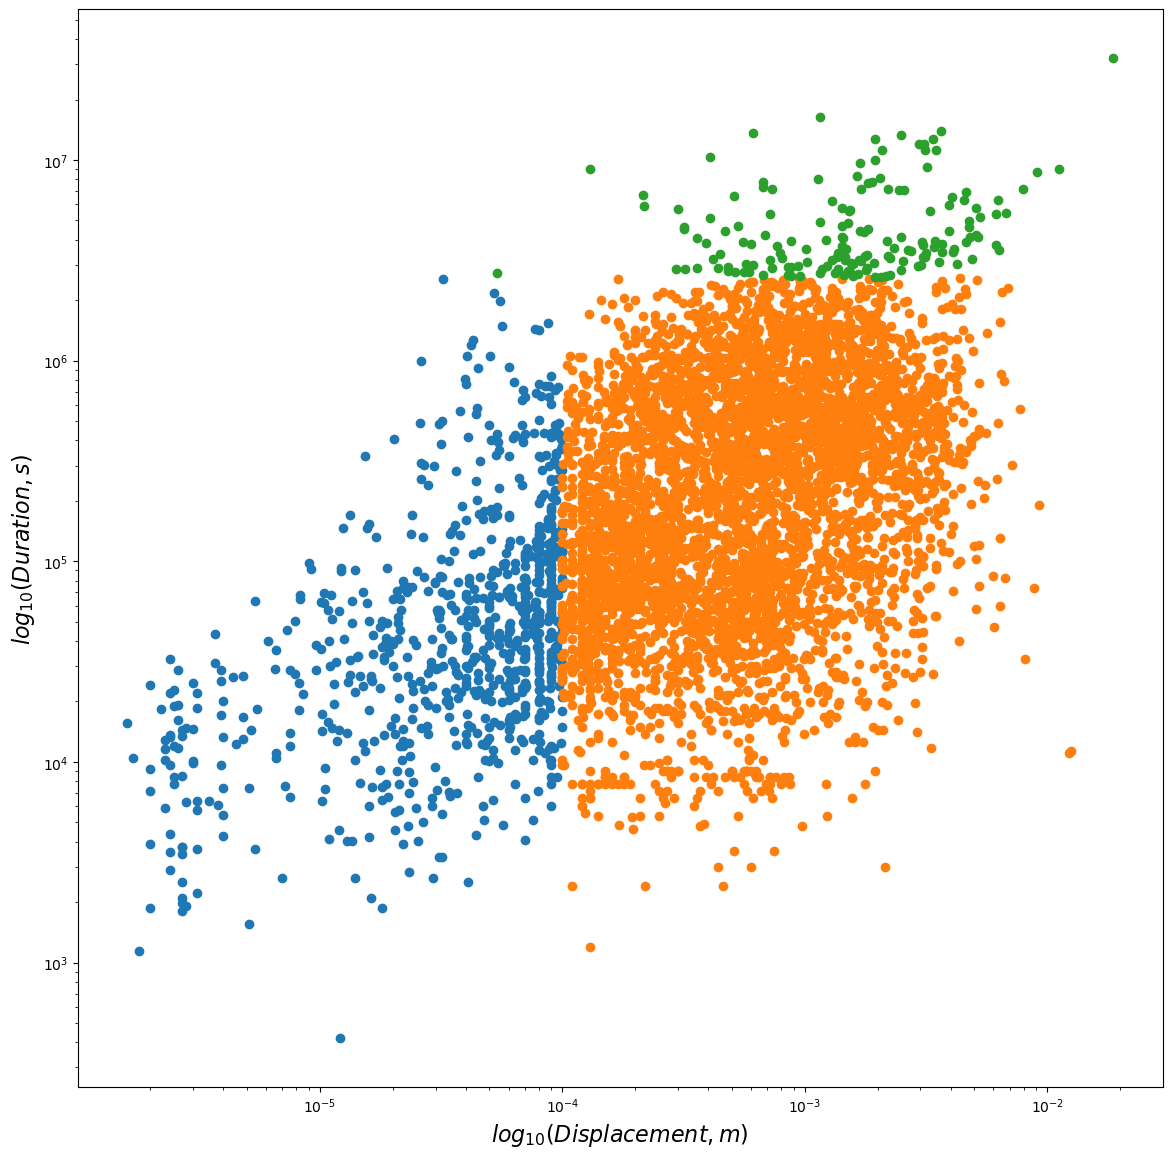

In [44]:
plt.figure(figsize=(14,14))
plt.scatter(df_creeplet['Displacement, mm']/1000,df_creeplet['Duration, hrs']*3600)
plt.scatter(df_all['Displacement, mm']/1000,df_all['Duration, hrs']*3600)
plt.scatter(df_surge['Displacement, mm']/1000,df_surge['Duration, hrs']*3600)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$log_{10}(Displacement, m)$',fontsize=16)
plt.ylabel('$log_{10}(Duration, s)$',fontsize=16) 

plt.show()

In [4]:
df_all = pd.read_csv("../../Data/DATA_tidied/Picks/Test_of_all_picks.csv",index_col=0)

columns = df_all.columns.tolist()
columns.append('Quality_check_final')


df_new_qc = pd.DataFrame(columns=columns)
df_new_qc

,Network,Creepmeter_full_name,Creepmeter_abbrv,Latitude,Longitude,"Sampling rate, mins",Event_id,ST,ET,"Displacement, mm","Duration, hrs",File_code,Quality_check_final


gathering info for XMR1_10T
../../Data/DATA_tidied/SAC/XMR1_10T.SAC
reading & processing SAC data
Identifying events
beginning QC for XMR1_10T


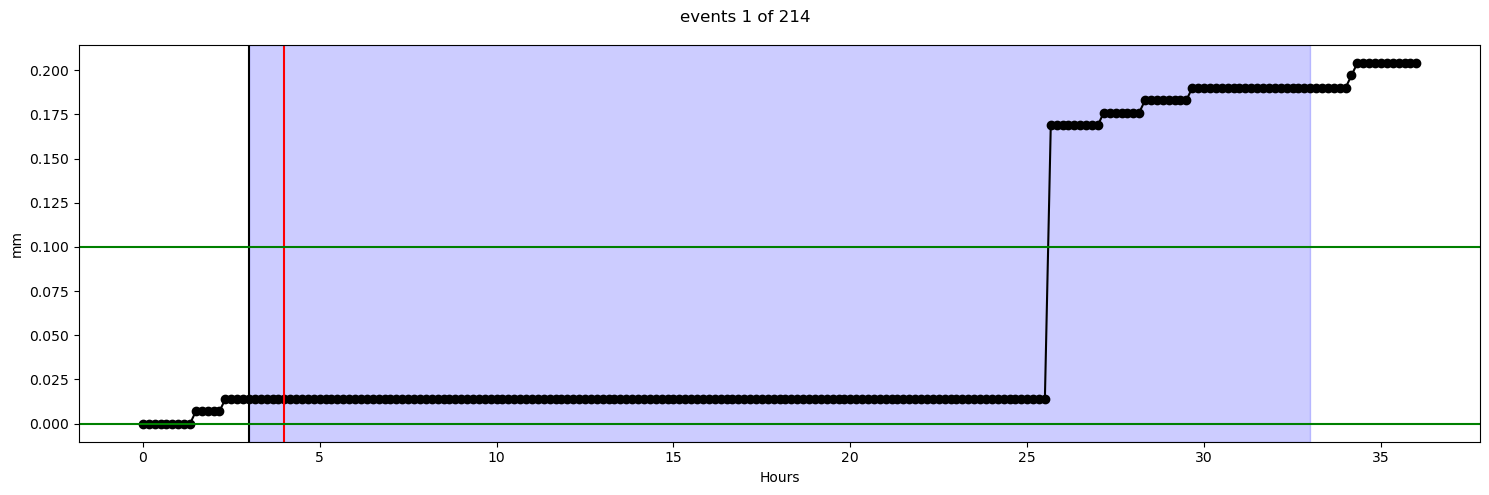

1/214


In [ ]:
plt.close('all')
for i in range(len(Creepmeter_dataframe)):
    print('gathering info for {k}'.format(k=Creepmeter_dataframe.File_code.iloc[i]))
    network = Creepmeter_dataframe.Network.iloc[i]
    file_code = Creepmeter_dataframe.File_code.iloc[i]
    if file_code in list(df_new_qc['File_code']):
        print("Alread Qc'ed")
    else:
        path = "../../Data/DATA_tidied/SAC/{q}.SAC".format(q = file_code)
        path_save = "../../Data/DATA_tidied/Picks/".format()
        check_dir(path_save)
        print(path)

        print('reading & processing SAC data')

        st = obspy.read(path)
        tr = st[0]
        tr.interpolate(sampling_rate=tr.stats.sampling_rate)
        tm = tr.times("utcdatetime")
        creep = tr.data
        sample_rate =  round(tr.stats.delta)/60
        tm_dt = []
        for w in range(len(tm)):
            tm_new = tm[w].datetime
            tm_dt.append(tm_new)
        tm_int, creep_int, upsampled = cep.interpolate(tm_dt,creep,sample_rate)
        
        print('Identifying events')
        #df_picks = pd.read_csv("../../Data/{p}/Picks/{q}_picks.csv".format(p=network,q =file_code),index_col=0)
        df_picks = df_all[df_all['File_code']==file_code]
        df_picks.reset_index(inplace=True,drop=True)      
        df_end=df_picks['ET']
        df_start=df_picks['ST']

        print('beginning QC for {k}'.format(k=file_code))
        QC = []
        for p in range(len(df_picks)):
            start = df_start.iloc[p]
            end = df_end.iloc[p]
            fig = plt.figure(figsize=(15,5))
            ax = plt.subplot(1,1,1)

            fig.suptitle('events {a} of {c}'.format(a = p+1,c =len(df_picks) ))
            boolarr_selecta = np.logical_and(np.array(tm_int)>=pd.to_datetime(start).replace(tzinfo=None)
                                            -dt.timedelta(hours=3),np.array(tm_int)<=pd.to_datetime(end).replace(tzinfo=None)
                                            +dt.timedelta(hours = 3))
            tm_selecta = tm_int[boolarr_selecta]
            tm_selecta = (tm_selecta - tm_selecta[0])/np.timedelta64(1, 'h')
            boolarr_event = np.logical_and(np.array(tm_selecta)>=3,np.array(tm_selecta)<=tm_selecta[-1]-3)

            creep_selecta = creep_int[boolarr_selecta]
            creep_selecta = creep_selecta - creep_selecta[0]
            creep_event = creep_selecta[boolarr_event]
            plt.plot(tm_selecta,creep_selecta,color='black',marker='o',markersize=6)
            left,right = ax.get_xlim()
            top,bottom = ax.get_ylim()
            plt.ylim(top,bottom)
            plt.xlim(left,right)
            
            thirty_days = (30*24)+3
            delta = tr.stats.delta
            min_length = (delta*6/60/60)+3
            plt.vlines([3,min_length,thirty_days],ymin=bottom,ymax=top,colors=['k','red','green'])
            plt.hlines([0,0.1],xmin=left,xmax=right,colors='green')
            ax.axvspan(tm_selecta[0]+3, tm_selecta[-1]-3, color='blue', alpha=0.2)
            #ax.axhspan(creep_event[0],creep_event[-1], color='yellow', alpha=0.2)
            plt.xlabel('Hours')
            plt.ylabel('mm')
        
            fig.tight_layout()
            plt.show()
            ##### QC ####
            print('{m}/{n}'.format(m=p+1,n=len(df_picks)))         
                
            while True:
                user_input = input("Is this event a creep event? (y/n): ").strip().lower()

                if user_input == 'y':
                    QC.append('CE')
                    print("Creep event identified")
                    # Do something for "yes"
                    break
                elif user_input == 'n':
                    QC.append('NCE')
                    print("This event is not a creep event")
                    # Do something for "esc" or just exit
                    break
                else:
                    print("Invalid input! Please enter 'y' to proceed or 'n' to exit.")
            
        

            plt.close() 

        
        df_picks['Quality_check_final'] = QC
        print(df_picks)
        print('QC completed')
        df_new_qc = pd.concat([df_new_qc,df_picks],ignore_index=True)

In [21]:
delta = tr.stats.delta

In [ ]:
min_length = delta*6/60/60

0.9999999757856135

In [ ]:
df_new_qc

In [104]:
df_new_qc.drop(df_new_qc[df_new_qc['Quality_check_final']!='CE'].index,inplace=True)

In [106]:
df_new_qc.to_csv('../../Data/QCed_creep_event_catalogue_XMR1.csv')